About Proejct📜:¶
I'm currently learning MLOps for Deep Learning/BERT model so for that I picked up a text-data from Kaggle which jigsaw-comment-classification-challange.
I uploaded the code of whole ongoinh comment-toxicity-detection project on https://github.com/karan842/comment-toxicity
I created DVC based data cleaning pipeline which can clean the text data and saved them in .csv format.
Meanwhile, I started analyzing the text data to gain information about the comments and how they are i.e toxic, insulting, threating or all.
Perfomed EDA and plotted the charts, graphs using Python libraries such as Matplotlib and Seaborn. You can find text analytics notebook in notebooks folder on given repository.
After performing text data cleaning and Analyzing process and I started building a Tensorflow based neural network model which can detect the toxicity in the comment. For that I've BERT pre-trained model. You can also find that notebook on notebooks folder.
I trained the model on Kaggle GPU P100, although I've GPU in my system but I prefer Kaggle for acceleration. I saved the model and used it in Flask app under APIs.
I tested APIs using Postman and then built a dockerfile which can support GPU and CUDNN to run neural network model.
I'll deploy this FlasAPI on Cloud using using Github Actions.
What is in this kernel🤔?
In this kernel we'll look at the model evaluation part for multilabel classification data.

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses

Let's revise some important concepts for model evaluation techniques on classification data.
Source: ChatGPT
Confustion Matrix: A matrix that displays the number of true positive, true negative, false positive and false negative predictions made by a model.

True Positive(TP) represents the number of True Positives. This refers to the total number of observations that belong to the positive class and have been predicted correctly.

True Negative(TN) represents the number of True Negative. This is the total number of observations that belong to the negative class and have been predicted correctly.

False Positive(FP) also known as Type 1 error. This is total number of observation that have been predicted to belong positive class, but instead they are actually belong to negative class

False Negative(FN) also known as Type 2 error. This is total number of observation that have been predicted to belong negative class, but instead belong to the positive class

Accuracy: The proportion of correctly classified instances out of the total number of instances. It is the most commonly used metric for classification problems, but it can be misleading if the classes are imbalanced. TP/TP+FP

Precision: The proportion of true positive predictions out of all positive predictions made by the model. It measures how many of the positive predictions were actually correct.

Recall The proportion of true positive predictions out of all actual positive instances. It measures how well the model can find all the positive instances. TP/TP+FN

F1 Score: The harmonic mean of precision and recall. It is a balance between precision and recall and can be used when both are important.

P.S: We're not using AUC-ROC metrices because thery useful in binary classification problem.

What is Multi-label classification? How it is different than Single-label classification.
Multi-label classification is a type of supervised machine learning problem where each instance can be assigned multiple labels, rather than just one label in single-label classification.
Key Differences

Label Independence: In single-label classification, the labels are mutually exclusive, meaning that an instance can only have one label. In multi-label classification, the labels are not mutually exclusive, meaning that an instance can have multiple labels.

Output format: In single-label classification, the output format is typically a single label or class. In multi-label classification, the output format is typically a binary vector or a probability vector, where each element represents the likelihood of a particular label being assigned to the instance.

Evaluation Metrics: Because of the different output format, the evaluation metrics for multi-label classification are also different from those of single-label classification. Some commonly used metrics include hamming loss, subset accuracy, jaccard similarity, and F1-score.

Hamming Losss:
It is a commonly used evaluation metric for measuring the performance of a classifier. It is defined as the proportion of labels that are incorrectly predicted. The value ranges from 0 (perfect prediction) to 1 (all labels are incorrectly predicted). Advantages of using Hamming loss is that it penalizes all types of errors equally. In other words, it does not distinguish between false positives and false negatives. It is that it's easy to compute and understand. It doesn't take into account the order of the labels, and it doesn't consider the correlations between labels.

Jaccard Similarity
It is defined as the proportion of labels that are correctly predicted out of the total number of labels in the true and predicted sets. The Jaccard similarity for a dataset is the average Jaccard similarity over all instances in the dataset. The value ranges from 0 (no labels are correctly predicted) to 1 (all labels are correctly predicted). It penalizes predictions where too many labels are predicted, but rewards predictions where the correct labels are predicted. Jaccard similarity doesn't take into account false negatives, which means it only cares about the labels that were predicted regardless of the labels that were missed.

In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))
df = pd.read_csv(r"C:\Users\islam\OneDrive\Desktop\Work File\Machine Learning\Deep Learing\Toxic-Comment-Classification\archive (1)\train.csv")
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [4]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [5]:
df['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [6]:
df['threat'].value_counts()

threat
0    159093
1       478
Name: count, dtype: int64

In [7]:
df['severe_toxic'].value_counts()

severe_toxic
0    157976
1      1595
Name: count, dtype: int64

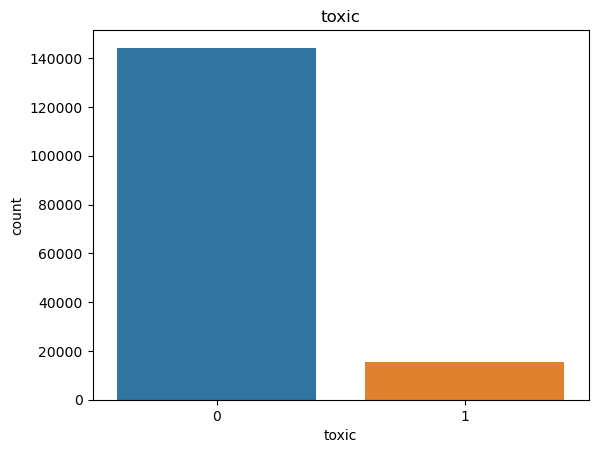

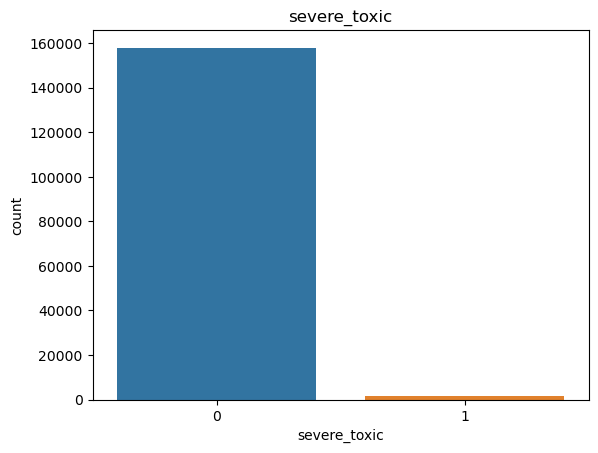

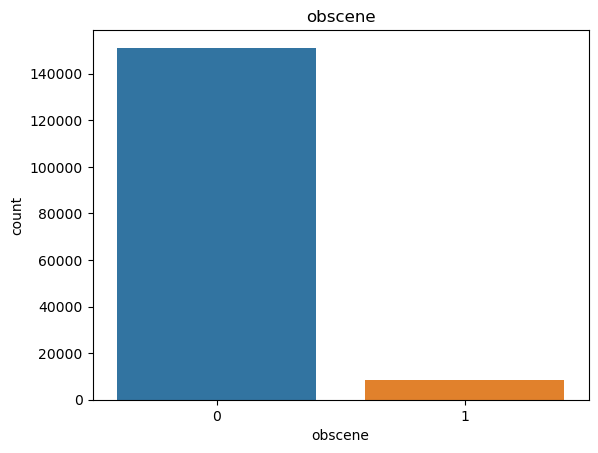

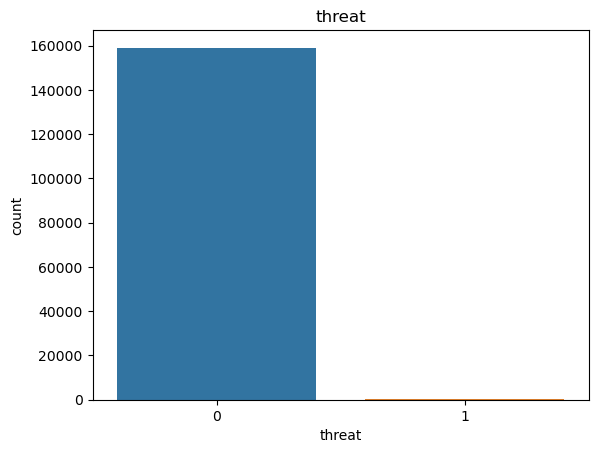

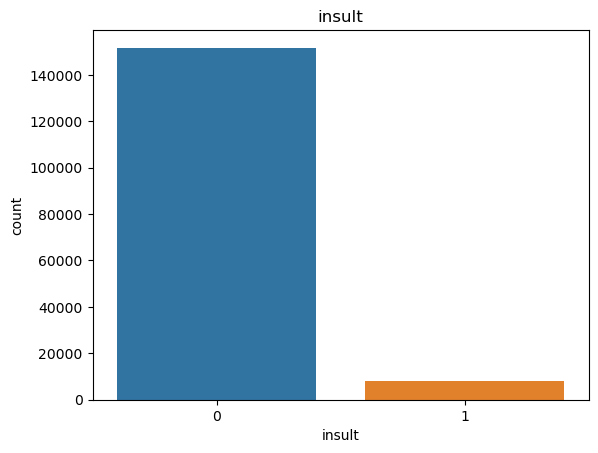

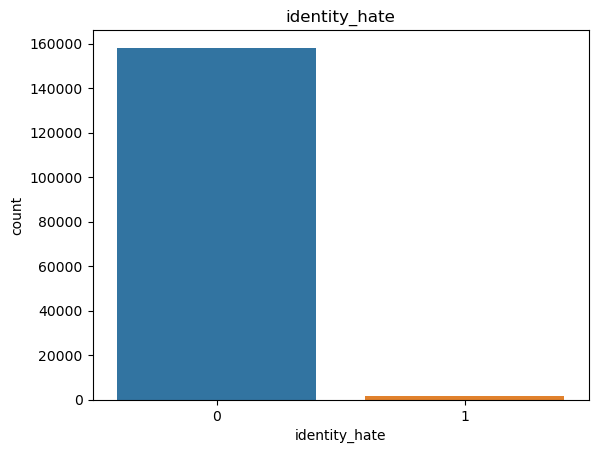

In [8]:
cat_val = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
for c in cat_val:
    sns.countplot(x=c,data= df)
    plt.title(c)
    plt.show()

In [9]:
import nltk
import re
from nltk.corpus import stopwords
nltk.data.path.append('path_to_extracted_data_directory')
stopwords

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>

In [10]:
import re
stopwords = ["the", "and", "is", "on", "in", "if", "for", "a", "an", "of", "or", "to", "it", "you", "your"]

In [11]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove web links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove special characters, punctuation marks, and newlines
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text)

    # Remove stopwords
    text = ' '.join(word for word in text.split() if word.lower() not in stopwords)

    return text.lower()

In [12]:
texts = [
    "\nMore\nI can't make any       real sugges%%%%%tions on improvement - I wondered if the section statistics should b|e later on, or a subsect\nion of 'types of accidents'  -I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport"
]
cleaned_texts = [clean_text(text) for text in texts]
print(cleaned_texts)

['more i cant make any real suggestions improvement i wondered section statistics should be later subsect ion types accidents i think references may need tidying so that they are all exact same format ie date format etc i can do that later noone else does first have any preferences formatting style references want do yourself please let me know there appears be backlog articles review so i guess there may be delay until reviewer turns up its listed relevant form eg wikipediagoodarticlenominationstransport']


In [13]:
df['comment_text'] = df['comment_text'].apply(clean_text)
df['comment_text'].head()

0    explanation why edits made under my username h...
1    daww he matches this background colour im seem...
2    hey man im really not trying edit war its just...
3    more i cant make any real suggestions improvem...
4    sir are my hero any chance remember what page ...
Name: comment_text, dtype: object

In [14]:
target_labels= [col for col in df.columns if df[col].dtypes == 'int64']
target_labels

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

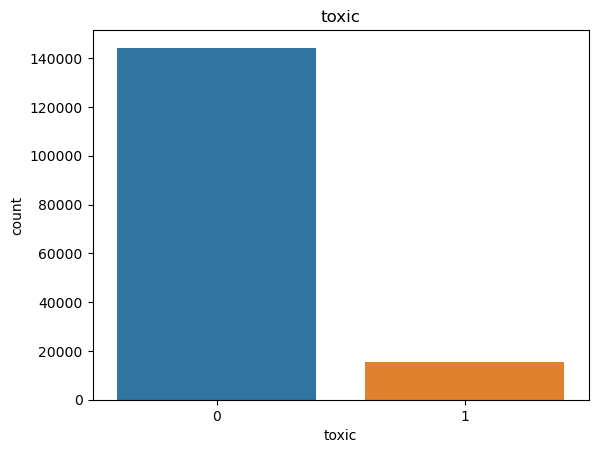

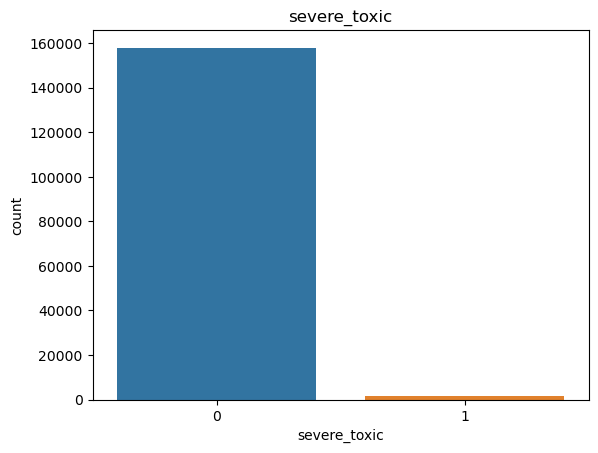

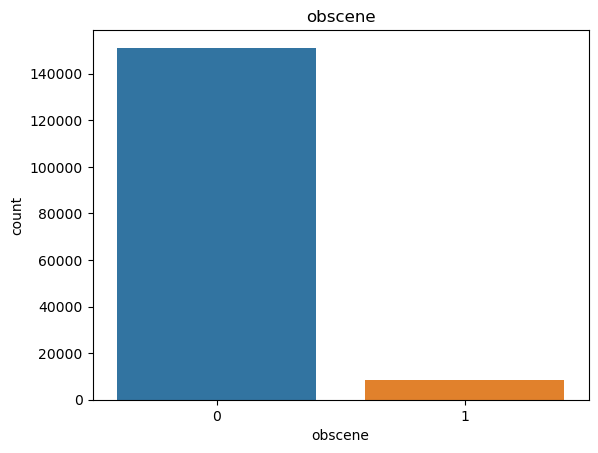

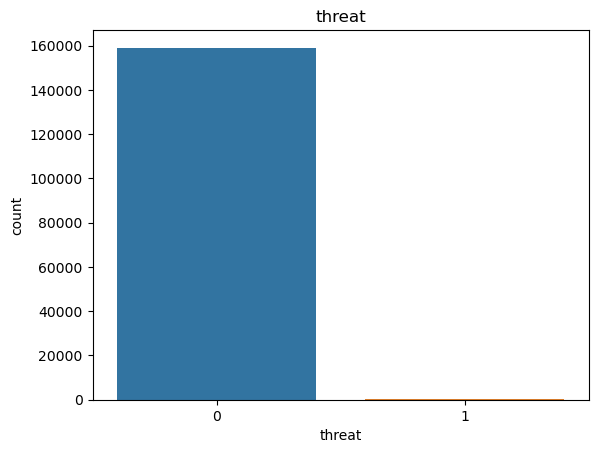

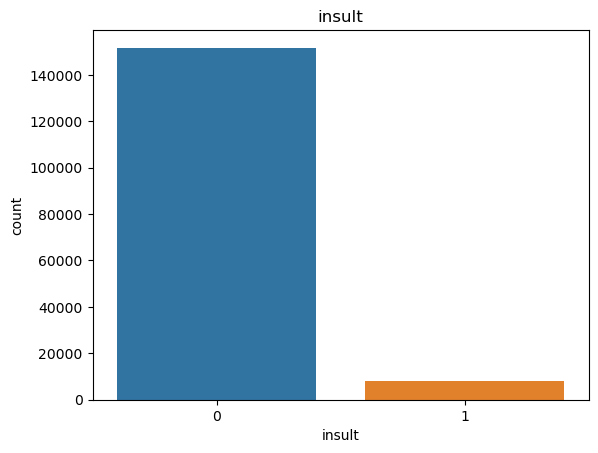

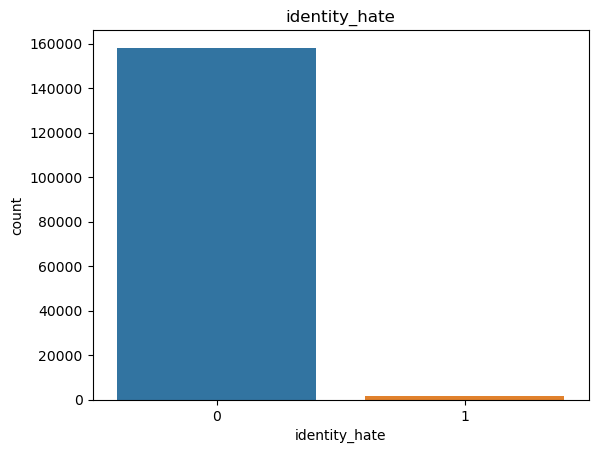

In [15]:
cat_val = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
for c in cat_val:
    sns.countplot(x=c,data= df)
    plt.title(c)
    plt.show()


In [16]:
from wordcloud import WordCloud, STOPWORDS

In [17]:
df[df['toxic'] == 1]['comment_text'].describe()

count                                             15294
unique                                            15173
top       graceful slick non other than ungraceful dick
freq                                                  8
Name: comment_text, dtype: object

In [18]:
df[df['severe_toxic'] == 1]['comment_text'].describe()

count                  1595
unique                 1592
top       fuck off fuck off
freq                      2
Name: comment_text, dtype: object

In [19]:
df[df['toxic'] == 0]['comment_text'].describe()

count     144277
unique    143036
top             
freq          28
Name: comment_text, dtype: object

In [20]:
df[df['severe_toxic'] == 0]['comment_text'].describe()

count     157976
unique    156605
top             
freq          28
Name: comment_text, dtype: object

In [21]:
df['comment_text'].head(100)

0     explanation why edits made under my username h...
1     daww he matches this background colour im seem...
2     hey man im really not trying edit war its just...
3     more i cant make any real suggestions improvem...
4     sir are my hero any chance remember what page ...
                            ...                        
95    thanks i can see that violating clearly stated...
96             hi thanks our kind words see around talk
97    collusion poker this regarded as most heinous ...
98    thanks much however its been resolved why that...
99    can do all youre doing right now but get usern...
Name: comment_text, Length: 100, dtype: object

In [22]:
# Function to generate word cloud
def generate_wordcloud(text,Title):
    wordcloud = WordCloud(width=800, height=400,stopwords=set(STOPWORDS), background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

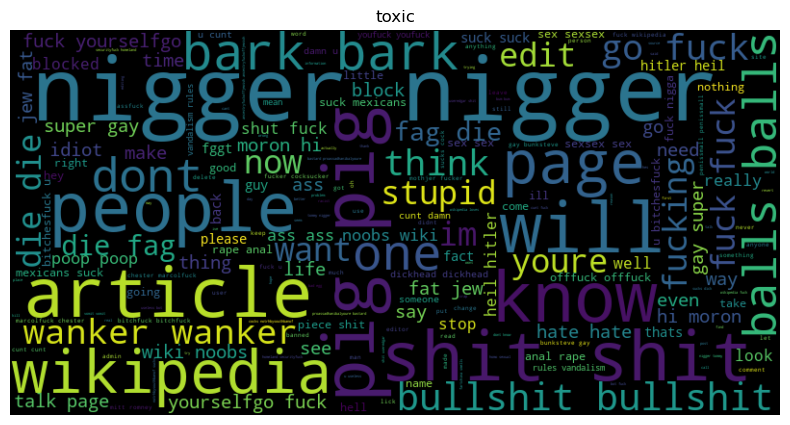

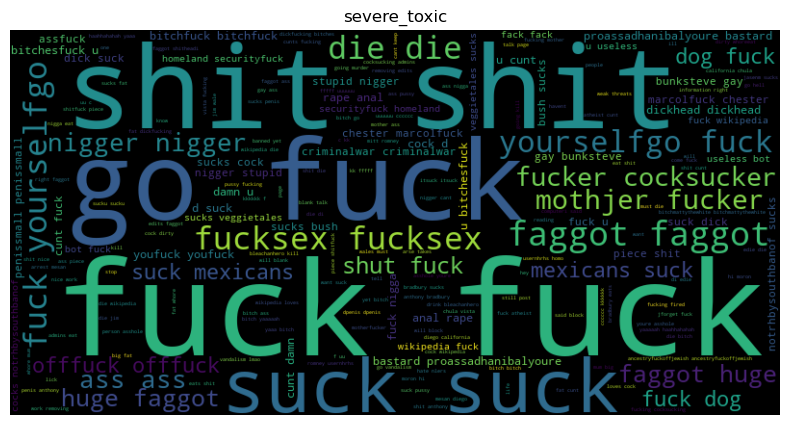

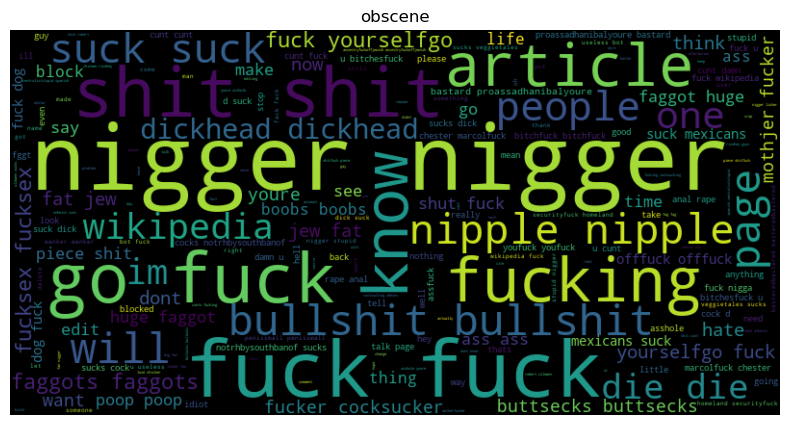

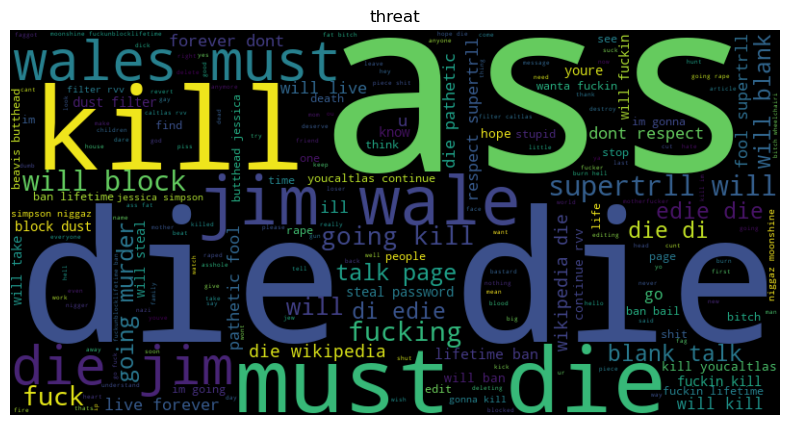

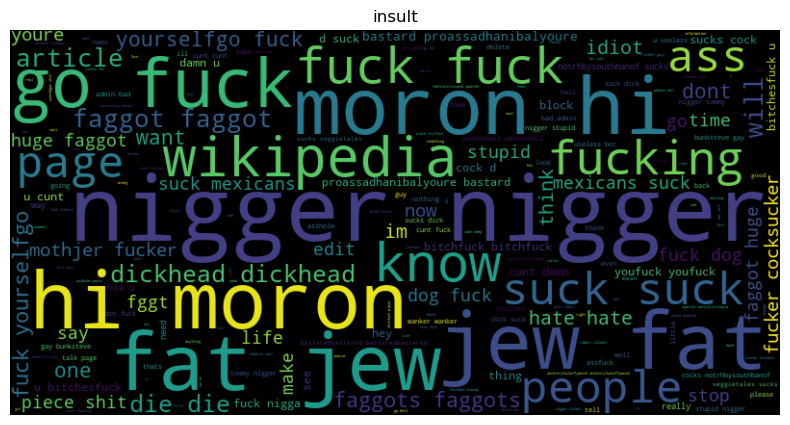

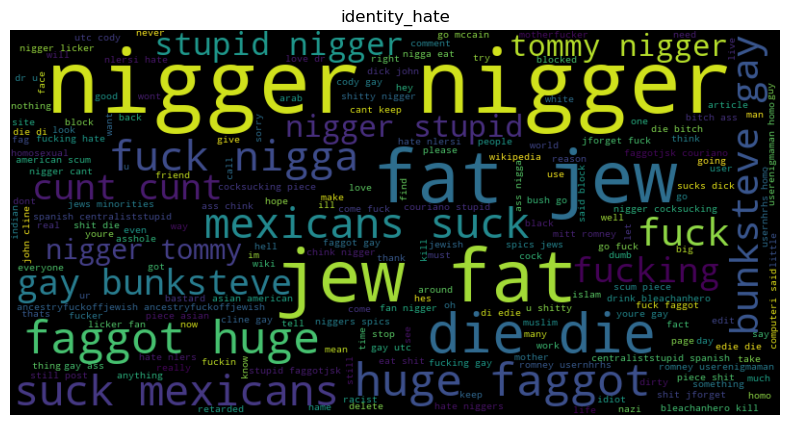

In [23]:
# Plot word clouds for each target label
for label in target_labels:
    text = ' '.join(df[df[label] == 1]['comment_text'].head(10000).values)
    generate_wordcloud(text,Title=label)
    plt.show()

 # Preprocess

In [24]:
from tensorflow.keras.layers import TextVectorization # تُستخدم هذه الدالة لتحويل النصوص إلى رموز عددية.

<img src="tv.jpg"/>

In [25]:
X = df['comment_text']
y= df.drop(['id','comment_text'],axis=1)

In [26]:
#X
#y

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state= 12)
X_train.shape,y_train.shape

((106912,), (106912, 6))

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
data = ['the dog and  cat','madein over']

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents into a bag-of-words representation
vectorizer.fit_transform(data)

# Get the feature names (words) in the vocabulary
vectorizer.get_feature_names_out(data)

counts = vectorizer.transform(data)
print(counts)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 5)	1
  (1, 3)	1
  (1, 4)	1


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents into a bag-of-words representation
X_train_tf = vectorizer.fit_transform(X_train)
X_test_processed = vectorizer.transform(X_test)
X_train_tf.shape

(106912, 167866)

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
tfid = TfidfTransformer()
X_train_tfid = tfid.fit_transform(X_train_tf)
X_train_tfid.shape

(106912, 167866)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [32]:
from sklearn.multioutput import MultiOutputClassifier  # For multi-label classification
from sklearn.multioutput import MultiOutputRegressor  # For multi-label regression
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the MultinomialNB class
mnb = MultinomialNB()

clf = MultiOutputClassifier(mnb)  # Replace YourClassifier with the desired classifier
clf.fit(X_train_tfid, y_train)

MultiOutputClassifier(estimator=MultinomialNB())

In [33]:
# Make predictions
nb_prediction = clf.predict(X_test_processed)
nb_pred = clf.predict(X_train_tfid)

In [35]:
logreg_clf = LogisticRegression(random_state=42,class_weight = 'balanced')

clf = MultiOutputClassifier(logreg_clf)  # Replace YourClassifier with the desired classifier
clf.fit(X_train_tfid, y_train)

MultiOutputClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                   random_state=42))

In [36]:
# Predicting Train and Test data
log_prediction = clf.predict(X_test_processed)
log_pred = clf.predict(X_train_tfid)

In [37]:
print(" Test Accuracy {0:.2f}%".format(100*accuracy_score(nb_prediction,y_test)))
print(" Train Accuracy {0:.2f}%".format(100*accuracy_score(nb_pred, y_train)))
print(classification_report(nb_prediction,y_test))

 Test Accuracy 89.94%
 Train Accuracy 90.08%
              precision    recall  f1-score   support

           0       0.20      0.97      0.34      1077
           1       0.02      0.36      0.04        28
           2       0.17      0.94      0.28       503
           3       0.00      0.00      0.00         8
           4       0.10      0.82      0.18       324
           5       0.01      0.28      0.02        18

   micro avg       0.15      0.92      0.26      1958
   macro avg       0.08      0.56      0.14      1958
weighted avg       0.17      0.92      0.29      1958
 samples avg       0.01      0.02      0.01      1958



In [39]:
MAX_FEATURES = 200000 # number of words in the vocab

# هذه الطبقة مسؤولة عن تحويل بيانات النص إلى تمثيلات رقمية مناسبة لموديلات التعلم الآلي.

vectorizer = TextVectorization(max_tokens=MAX_FEATURES,#حدد هذا المُعامل أقصى عدد من الكلمات التي يجب تضمينها في القاموس.
                                                  #قد يتم تصفية الكلمات التي تظهر بشكل أقل من حد معين (يتم تحديده بواسطة معايير أخرى).
                               
                               output_sequence_length=1800, #يحدد هذا المُعامل الطول الأقصى (بعدد الكلمات) لتسلسلات الإخراج
                                                           #. سيتم ملء التسلسلات الأقصر بالأصفار، و سيتم قطع التسلسلات الأطول.
                               
                               output_mode='int') # سيتم تحويل النص إلى تسلسلات من معرفات integer تتوافق مع الكلمات في القاموس.


In [41]:
vectorizer.adapt(X.values) # من المهم استدعاء adapt قبل استخدام vectorizer لتحويل النص الفعلي. يضمن ذلك بناء القاموس بشكل صحيح.
vectorized_text = vectorizer(X.values)

In [42]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(1600)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

train = dataset.take(int(len(dataset)*.6))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.2))

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding


model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(1, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='relu'))
# Final layer
model.add(Dense(6, activation='softmax'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Fit the model
#history = model.fit(vectorized_text, y, validation_split=0.33, epochs=1, batch_size=10)
history = model.fit(train, epochs=1, validation_data=val,batch_size=100)

  22/5984 ━━━━━━━━━━━━━━━━━━━━ 1:16:35 771ms/step - accuracy: 0.8990 - loss: 0.6908

KeyboardInterrupt: 

# ===========================================================

## General functions:

## When you pass text data through a vectorizer layer, it performs the following steps:

* Preprocessing (optional): Depending on the configuration, the layer may perform basic preprocessing steps such as removing punctuation or converting text to lowercase.
* Dictionary construction: The layer builds the dictionary by looking at the words in the training data. MAX_FEATURES selects from the most popular words or applies other filtering techniques.
* Map word to identifier: Each word in the input text is replaced with its corresponding integer identifier from the dictionary. If a word is not found in the dictionary, it may be assigned to a special "out of dictionary" (OOV) code.
* Filling or truncating: The sequence of result integer IDs is filled with zeros (if shorter than output_sequence_length) or truncated (if longer) to achieve a fixed length for all sequences.
### Using the TextVectorization layer, you can efficiently transform text data into digital representations that can be used as input for different types of machine learning models, especially those that deal with natural language processing (NLP) tasks such as text classification, machine translation, or sentiment analysis.

### Essentially, these two lines work together to convert text data into digital representations suitable for machine learning models. By building a dictionary and then mapping words to identifiers, text data is prepared for efficient processing by models that do not understand the raw text.

In [ ]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()# ضيف هذا السطر عملية تخزين مؤقت إلى خط أنابيب مجموعة البيانات.
dataset = dataset.shuffle(160000) # يخلط هذا السطر عناصر البيانات في مجموعة البيانات. يحدد وسيطة buffer_size أقصى عدد من العناصر التي يتم أخذ عينات عشوائية منها قبل الخلط.
dataset = dataset.batch(16)# يقسم هذا السطر مجموعة البيانات إلى مجموعات ذات حجم محدد. تحدد وسيطة batch_size عدد العناصر في كل دفعة.
dataset = dataset.prefetch(8) # helps bottlenecks # ضيف هذا السطر تحميل البيانات مسبقًا إلى خط الأنابيب. يتداخل تحميل البيانات مسبقًا مع تحضير البيانات مع التدريب، مما قد يحسن الأداء.

# Splite To Train , Val , Test 

In [ ]:
# Dataset length: The code first calculates the total length of the original dataset using len(dataset).
# This may return the number of elements in the data set or may raise an error if the length is not specified definitively.
# The take method retrieves a specified number of items from the beginning of the data set. Here, it takes 70% (multiplied by the length of the dataset and converted to an integer) of the items.
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

# Create Sequential Model

In [ ]:
from tensorflow.keras.models import Sequential # هذا السطر ضروري لإنشاء نماذج الشبكة العصبية المتسلسلة
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
from keras.losses import BinaryCrossentropy

* Bidirectional: Bidirectional layer, applying a layer in both the forward and backward directions of the sequence. This can be useful for capturing information from both past and future contexts in sequential data.
* Dense: Dense layer, also known as fully connected layer. It is a general-use layer that performs linear transformations and often acts as the final output layer of the model.
* Embedding: Embedding layer, used to represent categorical variables (such as words or characters) as dense vectors. This is an essential step for processing text data in neural networks.

In [ ]:
model = Sequential()
# Create the embedding layer 

model.add(Embedding(MAX_FEATURES+1, 32))
# This is the number of unique words or characters (features) in your dictionary.
# 32: This is the dimension of the embedding vectors.
# Determines the complexity of each word/letter representation. 
# Higher values typically capture more semantic relationships but require more memory and processing power.

# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))

# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [ ]:
# Compile the model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
# Compile the model specifying the loss function and optimizer
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
model.summary()

In [ ]:
# Train the model
# history = model.fit(train, epochs=1, validation_data=val)

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# Make Predictions

In [ ]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [ ]:
res = model.predict(input_text)

In [ ]:
(res > 0.5).astype(int)

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

In [ ]:
res.shape

# Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

# Test and Gradio

In [ ]:
import tensorflow as tf
import gradio as gr

In [ ]:
model.save('toxicity.h5')

In [ ]:
model = tf.keras.models.load_model('toxicity.h5')

In [ ]:
input_str = vectorizer('hey i freaken hate you!')

In [ ]:
res = model.predict(np.expand_dims(input_str,0))
res

In [ ]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [ ]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [ ]:
interface.launch(share=True)